In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

### Read the data as an appropriate Time Series data and plot the data.

In [2]:
df = pd.read_csv('Rose.csv')
df1 = df.copy
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [3]:
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [4]:
dt = pd.date_range(start = '1/1/1980', end = '08/1/1995', freq  = 'M')
df['Time'] = pd.DataFrame(dt)

In [5]:
df.drop('YearMonth', axis = 1, inplace = True)
df.set_index('Time', drop = True, inplace = True)

In [6]:
df.head()

,Rose
Time,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


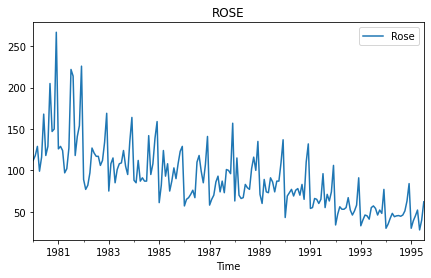

In [7]:
# Plotting the data
df.plot(figsize = (7,4));
plt.title('ROSE');

## Q2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [9]:
df.isnull().sum()

Rose    0
dtype: int64

In [10]:
df.describe()

,Rose
count,187.000000
mean,89.908354
std,39.245313
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


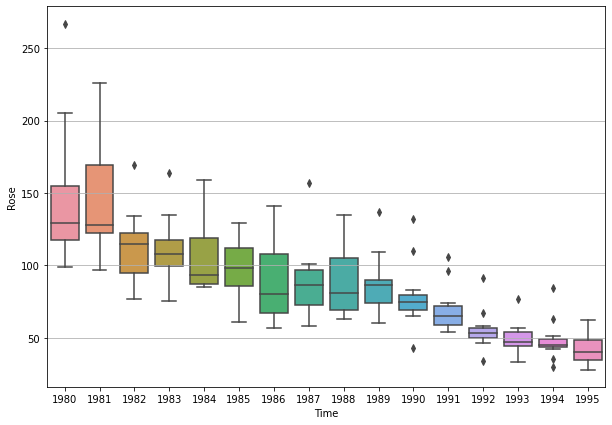

In [11]:
# Yearly plot
plt.figure(figsize = (10,7));
plt.grid(True)
sns.boxplot(x = df.index.year, y = df.Rose);

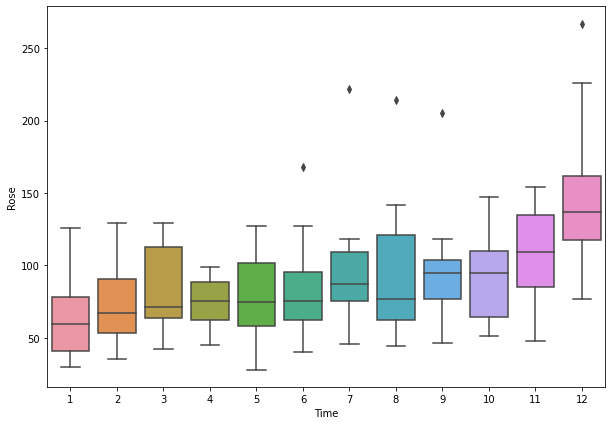

In [12]:
# Monthly PLot
plt.figure(figsize = (10,7))
sns.boxplot(x = df.index.month, y = df.Rose);

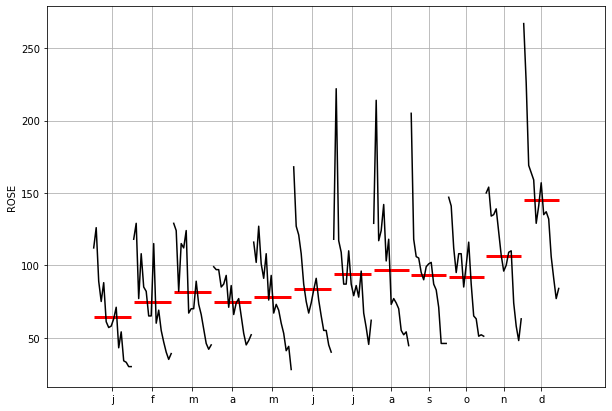

In [13]:
## Month Plot
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(10,7))
month_plot(df, ylabel='ROSE', ax=ax)
plt.grid()

In [14]:
## Year sales across month
yearly_sales_across_months = pd.pivot_table(df, values='Rose', columns=df.index.month, index=df.index.year)
yearly_sales_across_months

Time,1,2,3,4,5,6,7,8,9,10,11,12
Time,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.00000,129.00000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.00000,214.00000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.00000,117.00000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.00000,124.00000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.00000,142.00000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.00000,103.00000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.00000,118.00000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.00000,73.00000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.00000,77.00000,102.0,116.0,100.0,135.0


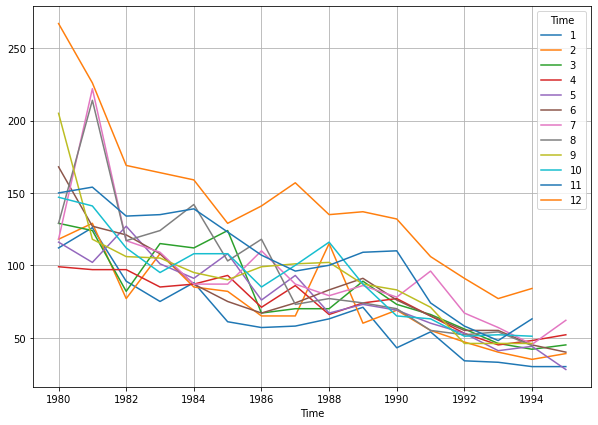

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,5

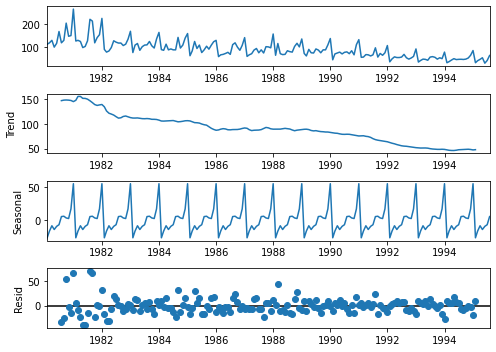

In [18]:
## Additive decomposition
decomposition_add = seasonal_decompose(df, model='additive')
decomposition_add.plot();

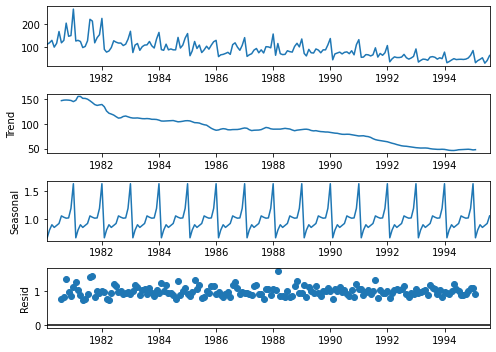

In [19]:
## Multiplicative Decomposition
decomposition_mul = seasonal_decompose(df, model='multiplicative')
decomposition_mul.plot();

## Q3 Split the data into training and test. The test data should start in 1991.

In [20]:
train = df[df.index.year<1991]

In [21]:
test = df[df.index.year>=1991]

## Q4 Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.

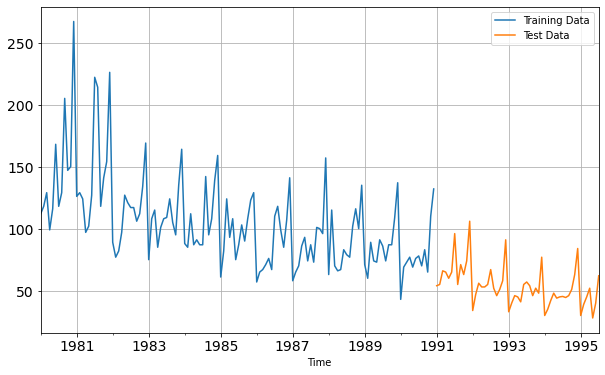

In [22]:
train['Rose'].plot(figsize=(10,6), fontsize=14)
test['Rose'].plot(figsize=(10,6), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

#### Models Built: -
1. Linear Regression
2. Naive Approach
3. Simple Average
4. Moving Average
5. Suitable Exponential Smoothing

#### 1. Linear Regression

In [23]:
## Linear Regression
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [24]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [25]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [26]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time                   
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time                   
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time                  
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time                  
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

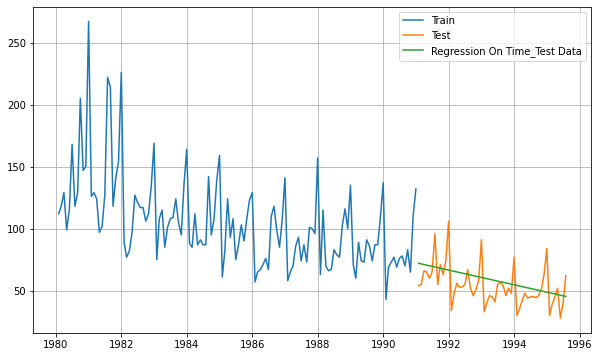

In [30]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(10,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [31]:
## Accuracy Metrics
from sklearn import metrics

## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.277


In [32]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.276693


#### 2. Naive Approach

In [33]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [34]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

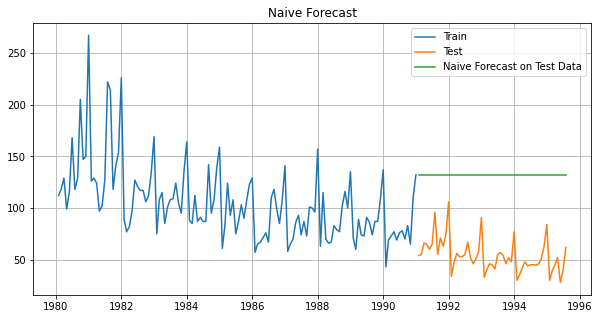

In [35]:
plt.figure(figsize=(10,5))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [36]:
## Accuracy
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.741


In [37]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.276693
NaiveModel,79.741326


#### 3. Simple Average

In [38]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [39]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


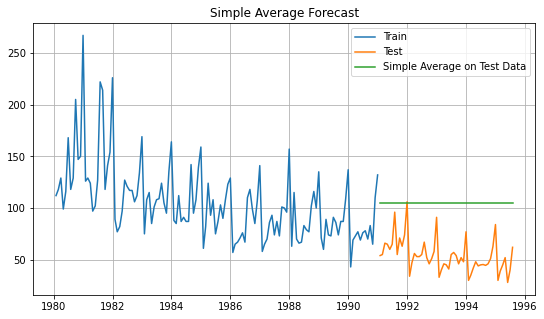

In [40]:
plt.figure(figsize=(9,5))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [41]:
## Accuracy Metrics
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.484


In [42]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.276693
NaiveModel,79.741326
SimpleAverageModel,53.483727


#### Exponential Smoothing

In [43]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

<AxesSubplot:xlabel='Time'>

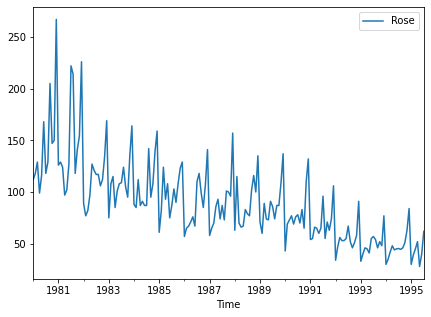

In [44]:
df.plot()

- Data has seasonality: Hence moving with Holt winter

In [45]:
TES_train = train.copy()
TES_test = test.copy()

In [46]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [47]:
model_TES_autofit = model_TES.fit()

In [48]:
model_TES_autofit.params

{'smoothing_level': 0.10609628211044227,
 'smoothing_slope': 0.04843853483296353,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565233828687,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550285, 1.65927166, 1.80572675, 1.58888842, 1.77822733,
        1.92604398, 2.11649492, 2.25135237, 2.11690636, 2.08112883,
        2.40927327, 3.30448211]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [49]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time,,
1991-01-31,54.0,56.674334
1991-02-28,55.0,63.471272
1991-03-31,66.0,68.788792
1991-04-30,65.0,60.277823
1991-05-31,60.0,67.180378


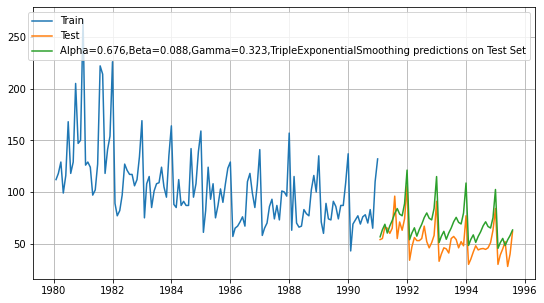

In [50]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(9,5))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [51]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.401


In [52]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.276693
NaiveModel,79.741326
SimpleAverageModel,53.483727
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",17.400641


## Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.242
DF test p-value is 0.466437102037184
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.
Let us take one level of differencing to see whether the series becomes stationary.

In [55]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.161
DF test p-value is 3.034192419073321e-11
Number of lags used 12


Now, let us go ahead and plot the stationary series.

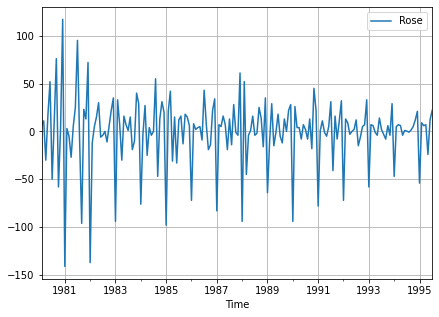

In [56]:
df.diff().dropna().plot(grid=True);

## Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [57]:
# Lets have a kook at the ACF and PACF plots to get an idea about the range of p and q values
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

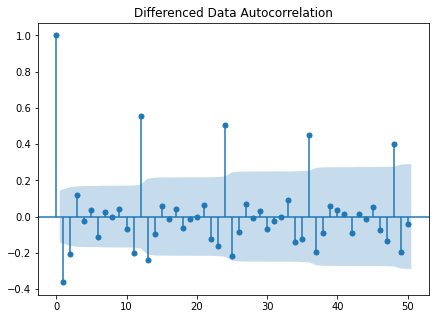

In [58]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

q = 2

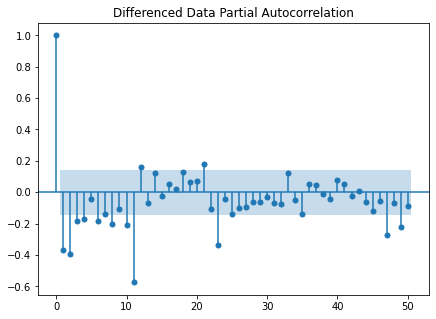

In [59]:
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',zero = True)
plt.show()

p = 3

#### Checking stationary on the train data

<AxesSubplot:xlabel='Time'>

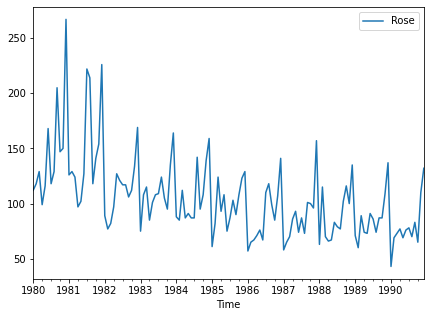

In [60]:
train.plot()

In [61]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047064
Number of lags used 13


Training data not stationary

In [62]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782412e-08
Number of lags used 12


Training data stationarity at 1st differencing

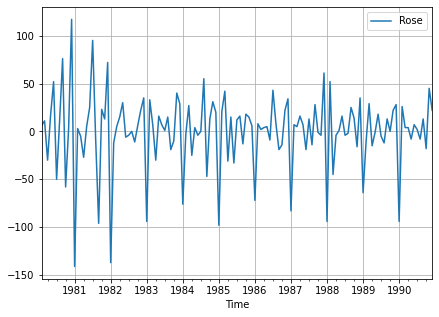

In [63]:
train.diff().dropna().plot(grid=True);

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


#### Building automated ARIMA Model

In [65]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [66]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [67]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.154672912435
ARIMA(0, 1, 1) - AIC:1282.3098319748324
ARIMA(0, 1, 2) - AIC:1279.6715288535825
ARIMA(0, 1, 3) - AIC:1280.5453761734661
ARIMA(1, 1, 0) - AIC:1317.3503105381455
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.870723423192
ARIMA(1, 1, 3) - AIC:1281.8707223309991
ARIMA(2, 1, 0) - AIC:1298.6110341604872
ARIMA(2, 1, 1) - AIC:1281.5078621868488
ARIMA(2, 1, 2) - AIC:1281.8707222264643


C:\Users\adity\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:1274.6951270248655
ARIMA(3, 1, 0) - AIC:1297.481091727172
ARIMA(3, 1, 1) - AIC:1282.4192776271934
ARIMA(3, 1, 2) - AIC:1283.7207405977126
ARIMA(3, 1, 3) - AIC:1278.663117706536


C:\Users\adity\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [68]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695127
15,"(3, 1, 3)",1278.663118
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [69]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sat, 24 Apr 2021   AIC                           1274.695
Time:                        00:13:26   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.050      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.710      0.000      -0.893      -0.565
ma.L1          1.0448      0.662      1.577      0.1

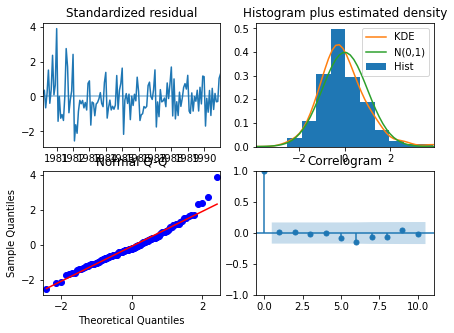

In [70]:
results_auto_ARIMA.plot_diagnostics();

#### Prediction on Test Set

In [71]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [72]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [73]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.83934849049562 
MAPE: 75.93374711104525


In [74]:
resultsDf_ = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_

,RMSE,MAPE
"ARIMA(2,1,2)",36.839348,75.933747


#### Building SARIMA based on AIC

In [75]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [76]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [77]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113863
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827217
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625264
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149123
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722076
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.9861743124363
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515176
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426177851
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206427466
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.546583469527
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765140019
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425053345168
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8917093454452
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029552
SARIMA(0, 1, 1)x(0, 0, 2, 6) 

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(0, 0, 2, 6) - AIC:1071.8736839722424
SARIMA(1, 1, 3)x(0, 0, 3, 6) - AIC:996.2173636323264
SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:1207.8901895612166
SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:1141.4931918275706
SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:1048.4718091240468
SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:989.94147320898
SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:1081.011658888319
SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:1083.9855621105005
SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:1035.2464656897732
SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:953.6849506768459
SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:1028.1858815551147
SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:1019.7324489909868
SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:1007.7128241637313
SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:955.6592575518038
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1231.9630734540344
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1128.9876565220652
SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:1058.6689517710352
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283259721805
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103215279502
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:996.8724018883338
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457853295
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798930577
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.2313464344845
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:961.0659794736882
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:975.6133308898898
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:977.0520553663075
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:962.9964599934872
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:962.7649526898273
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:1237.870281512563
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:1174.151682115538
SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1077.0677580069082
SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:995.757808580726
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:1185.2892266968374
SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:1125.9720323373542
SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:1055.079085282817
SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:991.

In [78]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744322
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582717
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205610
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684951


In [79]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sat, 24 Apr 2021   AIC                            951.744
Time:                                   00:36:34   BIC                            981.349
Sample:                               01-31-1980   HQIC                           963.750
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.076      0.000      -0.665      -0.341
ar.L2         -0.6627      0.084     -7.913

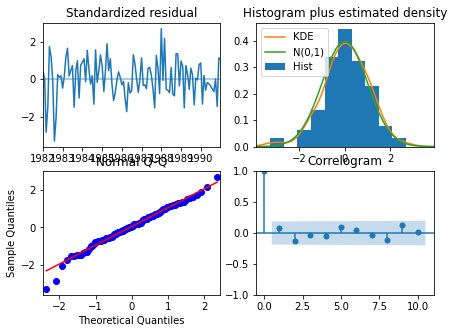

In [80]:
results_auto_SARIMA.plot_diagnostics();

In [81]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [82]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,66.905768,16.355797,34.848995,98.962540
1991-02-28,66.004780,16.487291,33.690284,98.319276
1991-03-31,74.429872,16.593273,41.907655,106.952089
1991-04-30,76.041069,16.715943,43.278422,108.803716
1991-05-31,78.405895,16.716558,45.642042,111.169747


In [83]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 27.14992317269024 
MAPE: 55.319863196929695


In [84]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])


resultsDf_ = pd.concat([resultsDf_,temp_resultsDf])

resultsDf_

,RMSE,MAPE
"ARIMA(2,1,2)",36.839348,75.933747
"SARIMA(2,1,3)(2,0,3,6)",27.149923,55.319863


## Q7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Manual ARIMA

<AxesSubplot:xlabel='Time'>

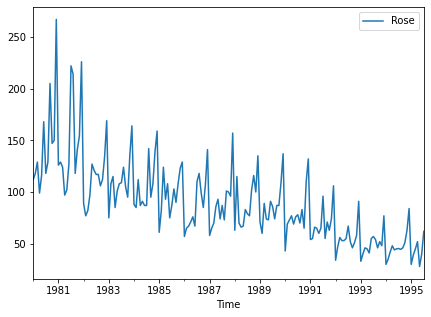

In [85]:
df.plot()

In [86]:
# Checking for stationarity
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.242
DF test p-value is 0.466437102037184
Number of lags used 13


* The data is not stationary
* Need to use differencing


<AxesSubplot:xlabel='Time'>

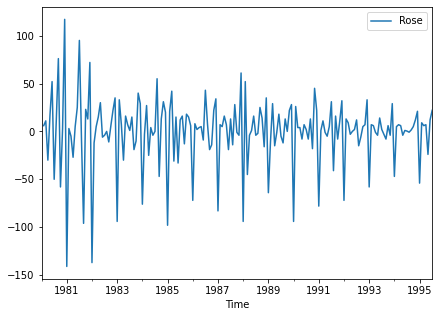

In [87]:
df.diff().plot()

In [88]:
dftest = adfuller(df.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.161
DF test p-value is 3.034192419073321e-11
Number of lags used 12


The data is stationary now

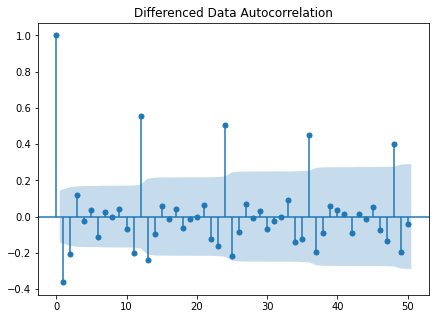

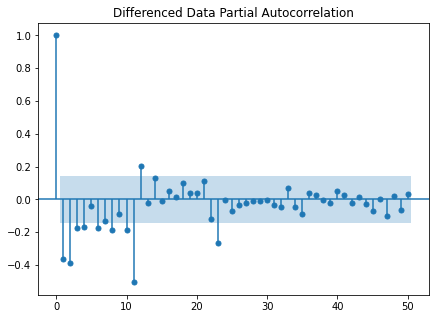

In [91]:
# Plotting the ACF plot to determine q
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method= 'ywmle')
plt.show()

From the above two plots: -
* q = 2
* p = 4

In [92]:
# The manual model : (p,d,q):(3,1,2)
manual_ARIMA = ARIMA(train['Rose'], order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -635.859
Date:                Sat, 24 Apr 2021   AIC                           1285.718
Time:                        00:40:18   BIC                           1305.845
Sample:                    01-31-1980   HQIC                          1293.896
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3838      0.923     -0.416      0.677      -2.192       1.425
ar.L2          0.0046      0.258      0.018      0.986      -0.502       0.511
ar.L3          0.0414      0.113      0.366      0.7

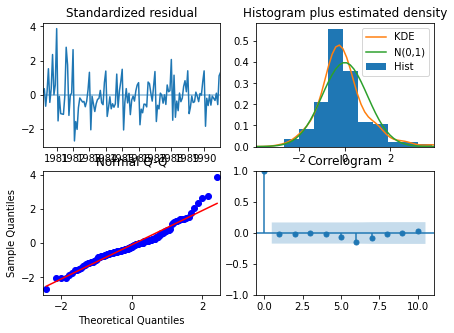

In [93]:
results_manual_ARIMA.plot_diagnostics();

In [96]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [97]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 37.06120240497585 
MAPE: 76.49843097600223


In [98]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,2)'])


resultsDf_ = pd.concat([resultsDf_,temp_resultsDf])

resultsDf_

,RMSE,MAPE
"ARIMA(2,1,2)",36.839348,75.933747
"SARIMA(2,1,3)(2,0,3,6)",27.149923,55.319863
"ARIMA(3,1,2)",37.061202,76.498431


#### Manual SARIMA

In [99]:
# Checking Stationarity
dftest = adfuller(df.diff(6).dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -9.255
DF test p-value is 9.724172783305914e-14
Number of lags used 6


We can clearly see, the data is stationarity for Seasonality = 6, hence D = 0

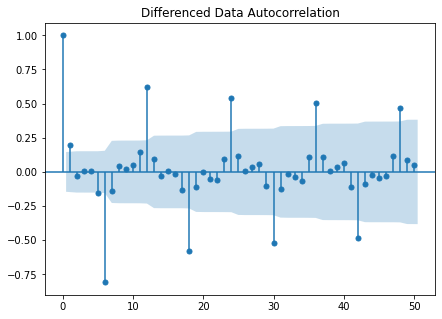

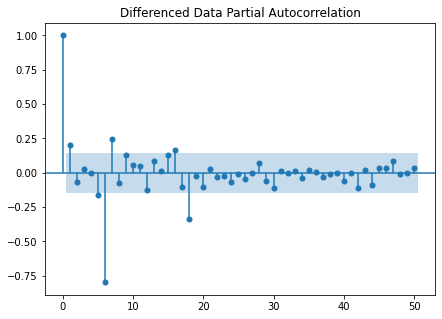

In [100]:
plot_acf(df['Rose'].diff(6).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff(6).dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method = 'ywmle')
plt.show()

From above two plots: -
* P = 2
* Q = Can't be determined

Finally we have: -
* p = 3
* d = 1
* q = 2
* P = 2
* D = 0
* Q = 1
* S = 6

In [101]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,2),
                                seasonal_order=(2, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                      
Dep. Variable:                                Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 0, [1], 6)   Log Likelihood                -518.906
Date:                             Sat, 24 Apr 2021   AIC                           1055.811
Time:                                     00:44:13   BIC                           1080.593
Sample:                                 01-31-1980   HQIC                          1065.871
                                      - 12-31-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1198      0.107     10.419      0.000       0.909       1.330
ar.L2         -0.3391      

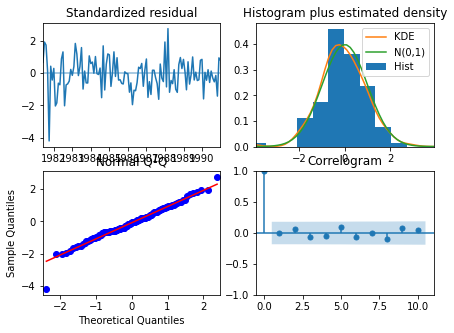

In [102]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [103]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [104]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 27.511177129028614 
MAPE: 55.61935535884655


In [105]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,1,2)(1,0,1,6)'])


resultsDf_ = pd.concat([resultsDf_,temp_resultsDf])

resultsDf_

,RMSE,MAPE
"ARIMA(2,1,2)",36.839348,75.933747
"SARIMA(2,1,3)(2,0,3,6)",27.149923,55.319863
"ARIMA(3,1,2)",37.061202,76.498431
"SARIMA(2,1,2)(1,0,1,6)",27.511177,55.619355


## Q9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

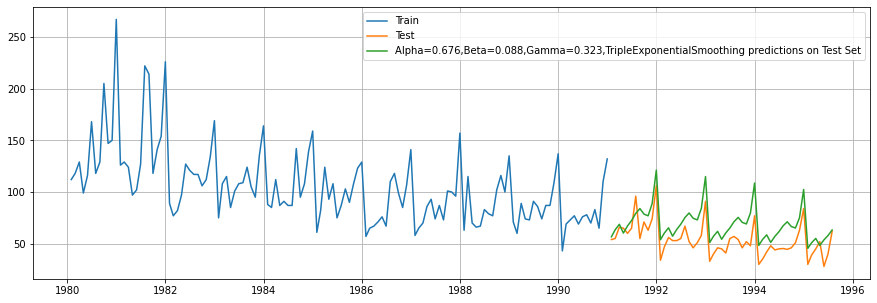

In [106]:
# Based on all the models, triple exponential smoothing comes out to be the best
plt.figure(figsize=(15,5))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [107]:
d = pd.date_range(start = '8/1/1995', end = '08/1/1996', freq  = 'M')

In [108]:
model_TES_f = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [109]:
model_TES_f = model_TES_f.fit()

In [110]:
ft = pd.DataFrame({'Time':d,'Pred':''})

In [111]:
ft.set_index('Time', drop = True, inplace = True)

In [112]:
ft['Prediction'] = model_TES_f.forecast(steps=len(d))

In [113]:
ft.drop('Pred',axis = 1, inplace = True)

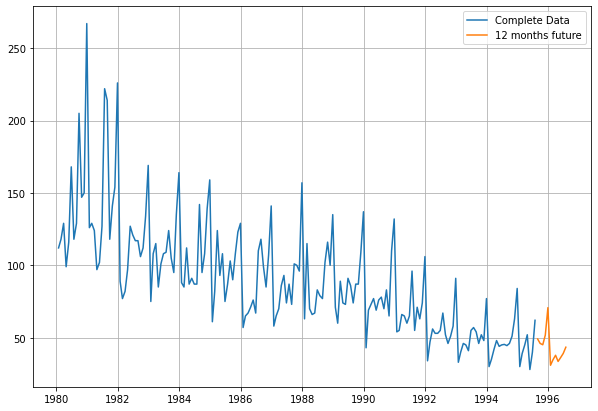

In [115]:
plt.figure(figsize=(10,7))
plt.plot(df['Rose'], label='Complete Data')
plt.plot(ft['Prediction'],label = '12 months future')



plt.legend(loc='best')
plt.grid();